In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [5]:
import sys
sys.path.append("../twintest")

import neuralnet 

In [34]:
# gps = synth_gen.GPsampler(gamma=12)
# f = gps.get_func()

In [35]:
f = lambda x: 2*np.tanh(x) + 2*np.sin(2*x) + x**3

In [55]:
target = 1 # By defaul X->Y
nb_samples = 50


Nx = {'name': 'uniform', 'var': 3}
Ny = {'name': 'normal', 'var': 20}
# Ny = {'name': 'normal', 'var': 1}

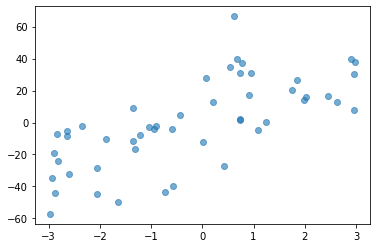

In [56]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y
plt.scatter(x, y, alpha=.6)

In [57]:
lr = [1, .1, .01, .001]

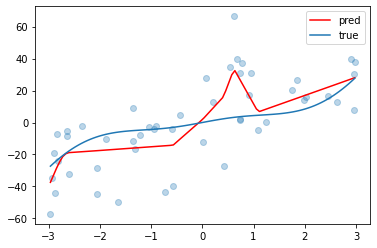

In [58]:
params = {'norm': False, 'learning_rate':lr, 'epochs': 500, 'H': 100}
net = neuralnet.net_model_selection(x, y, params)


xs = np.linspace(min(x), max(x), 100)
ys = net.predict(xs)

plt.scatter(x, y, alpha=.3)
plt.plot(xs, ys, label='pred', c='r')
plt.plot(xs, f(xs), label='true')
plt.legend()
